In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.plotly as py
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import warnings
# fuente original https://www.kaggle.com/mdolres/league-of-legends-2018-world-championiship/comments
warnings.filterwarnings('ignore')

plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
init_notebook_mode(connected=True) 

data = pd.read_csv('LECspring2020.csv', delimiter = ',')

#def comma_to_point(x):
#    return x.replace(',','.')
#data['gamelength'] = data['gamelength'].apply(comma_to_point).astype('float64')
#data['fttime'] = data['fttime'].apply(comma_to_point).astype('float64')
columns= data.columns
columns

Index(['gameid', 'url', 'league', 'split', 'date', 'game', 'patch', 'playerid',
       'side', 'position', 'player', 'team', 'champion', 'ban1', 'ban2',
       'ban3', 'ban4', 'ban5', 'gamelength', 'result', 'kills', 'deaths',
       'assists', 'teamkills', 'teamdeaths', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'firstblood', 'firstbloodkill',
       'firstbloodassist', 'firstbloodvictim', 'team kpm', 'ckpm',
       'firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes',
       'opp_elementaldrakes', 'infernals', 'mountains', 'clouds', 'oceans',
       'dragons (type unknown)', 'elders', 'opp_elders', 'heralds',
       'opp_heralds', 'firstbaron', 'barons', 'opp_barons', 'firsttower',
       'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
       'inhibitors', 'opp_inhibitors', 'damagetochampions', 'dpm',
       'damageshare', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgo

In [2]:
data.head()

,gameid,url,league,split,date,game,patch,playerid,side,position,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,ESPORTSTMNT05/1390161,https://matchhistory.na.leagueoflegends.com/en...,LEC,2020-1,2020-01-24 08:17:26,1,10.01,1,Blue,top,...,11.0,4767.0,7130.0,131.0,5538.0,8084.0,126.0,-771.0,-954.0,5.0
1,ESPORTSTMNT05/1390161,https://matchhistory.na.leagueoflegends.com/en...,LEC,2020-1,2020-01-24 08:17:26,1,10.01,2,Blue,jng,...,-1.0,4397.0,4539.0,96.0,4560.0,4513.0,73.0,-163.0,26.0,23.0
2,ESPORTSTMNT05/1390161,https://matchhistory.na.leagueoflegends.com/en...,LEC,2020-1,2020-01-24 08:17:26,1,10.01,3,Blue,mid,...,-4.0,4836.0,7300.0,129.0,4884.0,7203.0,127.0,-48.0,97.0,2.0
3,ESPORTSTMNT05/1390161,https://matchhistory.na.leagueoflegends.com/en...,LEC,2020-1,2020-01-24 08:17:26,1,10.01,4,Blue,bot,...,11.0,5188.0,5508.0,124.0,5985.0,4882.0,115.0,-797.0,626.0,9.0
4,ESPORTSTMNT05/1390161,https://matchhistory.na.leagueoflegends.com/en...,LEC,2020-1,2020-01-24 08:17:26,1,10.01,5,Blue,sup,...,0.0,3178.0,3922.0,23.0,3944.0,4299.0,21.0,-766.0,-377.0,2.0


In [3]:
#data = pd.DataFrame(data[(data.league == 'LEC')])

In [4]:
data.shape
#'G2 Esports'
#'Mikyx'

(1452, 99)

In [5]:
#data.to_csv(r'C:\Users\isaac\Desktop\Python\LOL\spring 2019\LECspring2020.csv', index = False)

In [6]:
player_names = [data.player.unique()]
player_names

[array(['Wunder', 'Jankos', 'PERKZ', 'Caps', 'Mikyx', 'Orome', 'Shad0w',
        'Humanoid', 'Carzzy', 'Kaiser', nan, 'Sacre', 'Trick', 'Jenax',
        'Crownshot', 'LIMIT', 'Cabochard', 'Skeanz', 'Saken', 'Comp',
        'Jactroll', 'Finn', 'Inspired', 'Larssen', 'Hans sama', 'Vander',
        'Dan Dan', 'Razork', 'FEBIVEN', 'Bvoy', 'denyk', 'Expect',
        'Caedrel', 'Mickey', 'Patrik', 'Tore', 'Odoamne', 'Gilius',
        'Abbedagge', 'FORG1VEN', 'Dreams', 'Bwipo', 'Selfmade', 'Nemesis',
        'Rekkles', 'Hylissang', 'Alphari', 'Xerxe', 'Nukeduck', 'Upset',
        'Destiny', 'Lurox', 'Innaxe', 'Steeelback', 'Selfie', 'Ventair'],
       dtype=object)]

In [7]:
player_names= player_list=['Wunder', 'Jankos', 'PERKZ', 'Caps', 'Mikyx', 'Orome', 'Shad0w',
        'Humanoid', 'Carzzy', 'Kaiser', 'Sacre', 'Trick', 'Jenax',
        'Crownshot', 'LIMIT', 'Cabochard', 'Skeanz', 'Saken', 'Comp',
        'Jactroll', 'Finn', 'Inspired', 'Larssen', 'Hans sama', 'Vander',
        'Dan Dan', 'Razork', 'FEBIVEN', 'Bvoy', 'denyk', 'Expect',
        'Caedrel', 'Mickey', 'Patrik', 'Tore', 'Odoamne', 'Gilius',
        'Abbedagge', 'FORG1VEN', 'Dreams', 'Bwipo', 'Selfmade', 'Nemesis',
        'Rekkles', 'Hylissang', 'Alphari', 'Xerxe', 'Nukeduck', 'Upset',
        'Destiny', 'Lurox', 'Innaxe', 'Steeelback', 'Selfie', 'Ventair']

In [8]:
player_list.remove('Mikyx')#list es el mateix pero sense el Mikyx

In [9]:
# Initialize the Dataframe
players = pd.DataFrame(data[(data.player == 'Mikyx')].mean())
players = players.transpose()
players.rename(index={0:'Mikyx'}, inplace=True)

# Append each player
for player in player_list:
        p = pd.DataFrame((data[(data.player == player)].mean())).transpose()
        p.rename(index={0: player}, inplace=True)
        players = pd.concat([players, p], sort=False)

In [10]:
players.columns

Index(['game', 'patch', 'playerid', 'gamelength', 'result', 'kills', 'deaths',
       'assists', 'teamkills', 'teamdeaths', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'firstblood', 'firstbloodkill',
       'firstbloodassist', 'firstbloodvictim', 'team kpm', 'ckpm',
       'firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes',
       'opp_elementaldrakes', 'infernals', 'mountains', 'clouds', 'oceans',
       'dragons (type unknown)', 'elders', 'opp_elders', 'heralds',
       'opp_heralds', 'firstbaron', 'barons', 'opp_barons', 'firsttower',
       'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
       'inhibitors', 'opp_inhibitors', 'damagetochampions', 'dpm',
       'damageshare', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold',
       'earned gpm', 'earnedgoldshare', 'goldspent', 'gspd', 'total cs',
       'minionkills', 'monsterkills', 'monsterkillsownjungle',
       

In [11]:
players

,game,patch,playerid,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
Mikyx,1.735294,10.045882,7.205882,1927.911765,0.764706,1.117647,2.882353,12.970588,19.117647,13.941176,...,3.242424,3532.757576,3897.515152,24.909091,3469.181818,3726.303030,20.000000,63.575758,171.212121,4.909091
Wunder,1.735294,10.045882,3.205882,1927.911765,0.764706,3.088235,3.088235,7.764706,19.117647,13.941176,...,4.757576,5363.181818,7047.030303,119.393939,5111.333333,6879.545455,114.666667,251.848485,167.484848,4.727273
Jankos,1.735294,10.045882,4.205882,1927.911765,0.764706,4.352941,2.558824,8.705882,19.117647,13.941176,...,-1.181818,5035.090909,5110.666667,84.030303,4838.212121,4973.515152,83.121212,196.878788,137.151515,0.909091
PERKZ,1.735294,10.045882,5.205882,1927.911765,0.764706,5.029412,2.558824,6.852941,19.117647,13.941176,...,-0.181818,5536.090909,7306.181818,131.151515,5252.000000,7156.363636,129.060606,284.090909,149.818182,2.090909
Caps,1.735294,10.045882,6.205882,1927.911765,0.764706,5.529412,2.852941,8.647059,19.117647,13.941176,...,-4.636364,5616.090909,5395.060606,116.151515,5653.454545,5394.303030,125.272727,-37.363636,0.757576,-9.121212
Orome,1.633333,10.044000,4.500000,1995.133333,0.500000,1.933333,3.133333,5.900000,14.333333,15.000000,...,-6.827586,5087.620690,6943.034483,115.655172,5360.344828,7007.172414,121.896552,-272.724138,-64.137931,-6.241379
Shad0w,1.633333,10.044000,5.500000,1995.133333,0.500000,3.766667,2.900000,5.933333,14.333333,15.000000,...,0.655172,4959.551724,5046.551724,88.137931,4866.103448,5039.482759,84.724138,93.448276,7.068966,3.413793
Humanoid,1.633333,10.044000,6.500000,1995.133333,0.500000,3.133333,3.200000,5.333333,14.333333,15.000000,...,-0.103448,5464.896552,7263.862069,132.448276,5544.896552,7156.413793,131.000000,-80.000000,107.448276,1.448276
Carzzy,1.633333,10.044000,7.500000,1995.133333,0.500000,4.533333,2.700000,4.666667,14.333333,15.000000,...,-0.931034,5613.827586,5495.413793,126.448276,5679.275862,5446.275862,127.000000,-65.448276,49.137931,-0.551724
Kaiser,1.633333,10.044000,8.500000,1995.133333,0.500000,0.966667,3.066667,8.633333,14.333333,15.000000,...,-0.103448,3504.413793,3682.724138,23.896552,3490.862069,3779.689655,24.068966,13.551724,-96.965517,-0.172414


In [12]:
# Establish players mean max min median might be useful later
player_mean = pd.DataFrame(players.mean()).transpose()
player_max = pd.DataFrame(players.max()).transpose()
player_min = pd.DataFrame(players.min()).transpose()
player_median = pd.DataFrame(players.median()).transpose()

# !!!!!!!!!!! stats provisionals, s'haurien d'adaptar per rol/team , etc
labels = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm']

# update player positions as they had been lost
for player in player_names:
    if player != 'Team':
        players.loc[player, 'position'] = data[data.player == player].position.values[0]
        players.loc[player, 'team'] = data[data.player == player].team.values[0]


team_names = data.team.unique()
teams = pd.DataFrame(data[(data.player == 'Team') & (data.team == 'G2 Esports')].mean())
teams = teams.transpose()
teams.rename(index={0:'G2 Esports'}, inplace=True)

for team in team_names:
    if team != 'G2 Esports':
        p = pd.DataFrame((data[(data.team == team) & (data.player == 'Team')].mean())).transpose()
        p.rename(index={0: team}, inplace=True)
        teams = pd.concat([teams, p], sort=False)

In [13]:
# Used for data visualization later
def simple_radar_graph(player_name, color='blue', players=players, role='jng'):
    x = pd.DataFrame(players.loc[player_name, labels]).transpose()
    player_max = pd.DataFrame(players[players.position == role].max()).transpose()
    
    data = [go.Scatterpolar(
      r = [(x['opp_csat15'].values[0] / player_max['opp_csat15'].values[0]) * 100,(x['csat15'].values[0] / player_max['csat15'].values[0]) * 100,100 * (x['monsterkills'].values[0] / player_max['monsterkills'].values[0]),100 * (x['monsterkillsownjungle'].values[0] / player_max['monsterkillsownjungle'].values[0]),100 * (x['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x['earnedgold'].values[0] / player_max['earnedgold'].values[0]),100 * (x["wardsplaced"].values[0] / player_max['wardsplaced'].values[0]),100 * (x["wpm"].values[0] / player_max['wpm'].values[0])],
	#theta = ['Wards','Damages to champs', 'Total gold','Kills','Deaths','Assists','Opponent gold difference at 15m','Wards'],
      theta = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm'],
      fill = 'toself',
         line =  dict(
                color = color
            )
    )]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 100]
        )
      ),
      showlegend = False,
      title = "{}".format(player_name)
    )
    fig = go.Figure(data=data, layout=layout)
    

    return iplot(fig, filename = "Radar")

# used for data visualization later
def vs_radar_graph(player_name1, player_name2, color1='orange', color2='lightgray',title=None, players=players,role='jng'):
    player_max = pd.DataFrame(players[players.position == role].max()).transpose()
    
    if not title:
         title='{} vs {}'.format(player_name1, player_name2)
    
    x1 = pd.DataFrame(players.loc[player_name1, labels]).transpose()
    x2 = pd.DataFrame(players.loc[player_name2, labels]).transpose()
    # MEDIAN : x3 = pd.DataFrame(players[players.position == role].median()).transpose()
    
    """
        MEDIAN
        go.Scatterpolar(
      name = player_name2,
      r = [(x3['wards'].values[0] / player_max['wards'].values[0]) * 100,(x3['dmgtochamps'].values[0] / player_max['dmgtochamps'].values[0]) * 100,100 * (x3['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x3['k'].values[0] / player_max['k'].values[0]),100 * (x3['d'].values[0] / player_max['d'].values[0]),100 * (x3['a'].values[0] / player_max['a'].values[0]),100 * (x3["wards"].values[0] / player_max['wards'].values[0])],
      theta = ['Wards','Damages to champs', 'Total gold','Kills','Deaths','Assists','Wards'],
      fill = 'toself',
         line =  dict(
                color = 'black'
            )
        ),
        
    add as 1st element in array below if you want
    """
    
    data = [go.Scatterpolar(
      name = player_name1,
      r = [(x1['opp_csat15'].values[0] / player_max['opp_csat15'].values[0]) * 100,(x1['csat15'].values[0] / player_max['csat15'].values[0]) * 100,100 * (x1['monsterkills'].values[0] / player_max['monsterkills'].values[0]),100 * (x1['monsterkillsownjungle'].values[0] / player_max['monsterkillsownjungle'].values[0]),100 * (x1['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x1['earnedgold'].values[0] / player_max['earnedgold'].values[0]),100 * (x1["wardsplaced"].values[0] / player_max['wardsplaced'].values[0]),100 * (x1["wpm"].values[0] / player_max['wpm'].values[0])],
      #theta = ['Wards','Damages to champs', 'Total gold','Kills','Deaths','Assists','Opponent gold difference at 15m','Wards'],
      theta = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm'],
      fill = 'toself',
         line =  dict(
                color = color1
            )
    ),
           
    go.Scatterpolar(
      name = player_name2,
      r = [(x2['opp_csat15'].values[0] / player_max['opp_csat15'].values[0]) * 100,(x2['csat15'].values[0] / player_max['csat15'].values[0]) * 100,100 * (x2['monsterkills'].values[0] / player_max['monsterkills'].values[0]),100 * (x2['monsterkillsownjungle'].values[0] / player_max['monsterkillsownjungle'].values[0]),100 * (x2['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x2['earnedgold'].values[0] / player_max['earnedgold'].values[0]),100 * (x2["wardsplaced"].values[0] / player_max['wardsplaced'].values[0]),100 * (x2["wpm"].values[0] / player_max['wpm'].values[0])],
      #theta = ['Wards','Damages to champs', 'Total gold','Kills','Deaths','Assists','Opponent gold difference at 15m','Wards'],
      theta = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm'],
      fill = 'toself',
         line =  dict(
                color = color2
            )
    )
           
    ]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 100]
        )
      ),
      showlegend = False,
      title = "{}".format(title)
    )
    fig = go.Figure(data=data, layout=layout)
    

    return iplot(fig, filename = "Radar")

#teams_labels = ['fb','gamelength', 'k', 'd', 'dmgtochamps','totalgold','fbaron','herald','ft','firstmidouter','firsttothreetowers','gdat15']
teams_labels = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm'],

# used for data visualization later
def teamvs_radar_graph(team_name1, team_name2, color1='orange', color2='lightgray',title=None, teams=teams):
    team_max = pd.DataFrame(teams.max()).transpose()
    
    if not title:
         title='{} vs {}'.format(team_name1, team_name2)
    
    x1 = pd.DataFrame(teams.loc[team_name1, teams_labels]).transpose()
    x2 = pd.DataFrame(teams.loc[team_name2, teams_labels]).transpose()

    data = [go.Scatterpolar(
      name = team_name1,
      r = [(x1['opp_csat15'].values[0] / player_max['opp_csat15'].values[0]) * 100,(x1['csat15'].values[0] / player_max['csat15'].values[0]) * 100,100 * (x1['monsterkills'].values[0] / player_max['monsterkills'].values[0]),100 * (x1['monsterkillsownjungle'].values[0] / player_max['monsterkillsownjungle'].values[0]),100 * (x1['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x1['earnedgold'].values[0] / player_max['earnedgold'].values[0]),100 * (x1["wardsplaced"].values[0] / player_max['wardsplaced'].values[0]),100 * (x1["wpm"].values[0] / player_max['wpm'].values[0])],
      #theta =['First Blood', 'Game length', 'Kills', 'Deaths', 'Damages to champs','Total gold','First Baron','Herald','First tower','First mid outer tower','First to three towers','Gold difference at 15', 'First Blood'],
      theta = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm'],
      fill = 'toself',
         line =  dict(
                color = color1
            )
    ),
           
    go.Scatterpolar(
      name = team_name2,
      r = [(x2['opp_csat15'].values[0] / player_max['opp_csat15'].values[0]) * 100,(x2['csat15'].values[0] / player_max['csat15'].values[0]) * 100,100 * (x2['monsterkills'].values[0] / player_max['monsterkills'].values[0]),100 * (x2['monsterkillsownjungle'].values[0] / player_max['monsterkillsownjungle'].values[0]),100 * (x2['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x2['earnedgold'].values[0] / player_max['earnedgold'].values[0]),100 * (x2["wardsplaced"].values[0] / player_max['wardsplaced'].values[0]),100 * (x2["wpm"].values[0] / player_max['wpm'].values[0])],
      #theta =['First Blood', 'Game length', 'Kills', 'Deaths', 'Damages to champs','Total gold','First Baron','Herald','First tower','First mid outer tower','First to three towers','Gold difference at 15', 'First Blood'],
      theta = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm'],
      fill = 'toself',
         line =  dict(
                color = color2
            )
    )
           
    ]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 100]
        )
      ),
      showlegend = False,
      title = "{}".format(title)
    )
    fig = go.Figure(data=data, layout=layout)
    

    return iplot(fig, filename = "Radar")

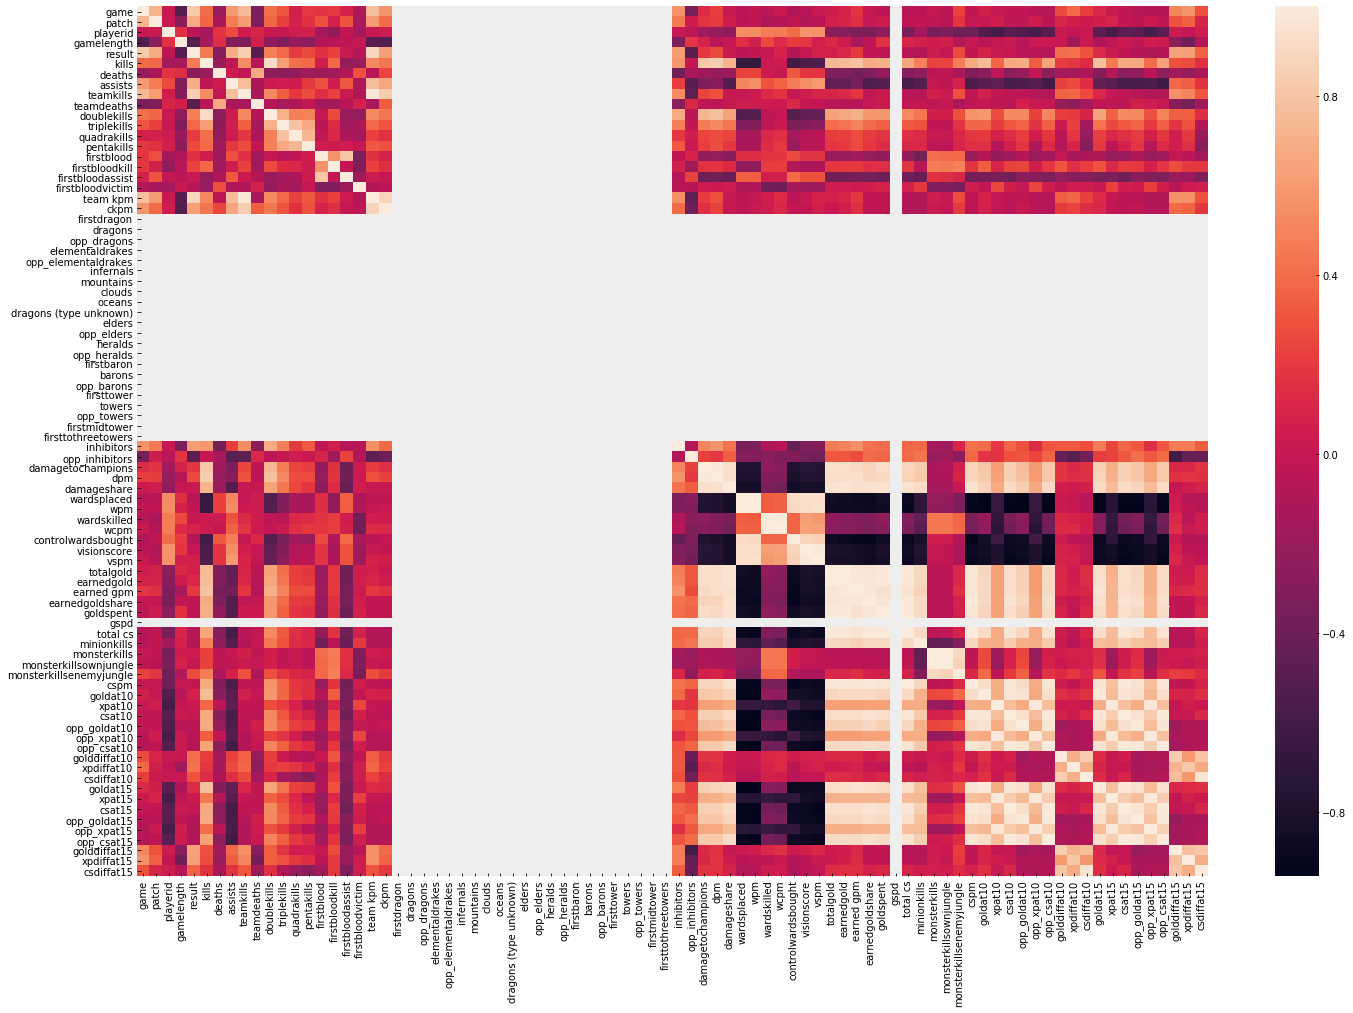

In [14]:
players_corr = players

# to avoid running the kernel everytime
if 'gameid' in players_corr.columns.tolist():
    # doubles/triples/quadras/pentas/okpm have suffered damages with the .mean() for unknown reasons,
    # elementals, airdrakes, ... are chosen with randomness so they're not significant
    # heraldtime barontime are not contained in players variables
    # time var : make no sense in corr
    players_corr = players_corr.drop(['doubles','triples','quadras','pentas','gameid','playerid','firedrakes','elders','elementals','waterdrakes','earthdrakes','airdrakes','heraldtime','okpm', 'gamelength'], axis=1)
    #players_corr = players_corr.drop(['doubles','triples','quadras','pentas','gameid','playerid','firedrakes','elders','elementals','waterdrakes','earthdrakes','airdrakes','heraldtime','okpm', 'gamelength'
                                     #'dragons','opp_dragons','firstdragon','elementaldrakes','opp_elementaldrakes','infernals'
                                     #'mountains', 'oceans','clouds','dragons'], axis=1)

corr = players_corr.corr()
f, ax = plt.subplots(figsize=(24, 16))
heatmap = sns.heatmap(corr)

## Top 10 most meaningful for winning stats

In [15]:
a = corr[corr != 1.0].max()
print('Top 10 most meaningful for winning stats')
i=0
while i <10:
    print(a.idxmax())
    a=a.drop(a.idxmax())
    i+=1


Top 10 most meaningful for winning stats
opp_csat10
opp_csat15
csat10
csat15
monsterkills
monsterkillsownjungle
totalgold
earnedgold
wardsplaced
wpm


## Compare players or teams

In [16]:
vs_radar_graph('Razork','Selfmade',color1='green', color2='orange', role='jng')

In [17]:
simple_radar_graph('Nemesis', color='orange', players=players, role='mid')

In [18]:
simple_radar_graph('Trick', color='grey', players=players, role='jng')

In [19]:
teamvs_radar_graph('G2 Esports','Fnatic', color1='grey', color2='orange', teams=teams)
#lo de teams no va bé

In [20]:


#team_name = 'G2 Esports'
#print('{} average game length on win : {} minutes'.format(team_name,data[(data.player.isna) & (data.team == team_name) & (data.result == 1)]['gamelength'].mean()))
#print('{} average game length on lose : {} minutes'.format(team_name,data[(data.player.isna) & (data.team == team_name) & (data.result == 0)]['gamelength'].mean()))

#team_name = 'Fnatic'
#print('\n{} average game length on win : {} minutes'.format(team_name,data[(data.player.isna) & (data.team == team_name) & (data.result == 1)]['gamelength'].mean()))
#print('{} average game length on lose : {} minutes'.format(team_name,data[(data.player.isna) & (data.team == team_name) & (data.result == 0)]['gamelength'].mean()))



In [21]:


graph_data = data[(data.player != 'Team')]
print('Number of different champions overall : {}'.format(len(graph_data['champion'].unique())))



Number of different champions overall : 102


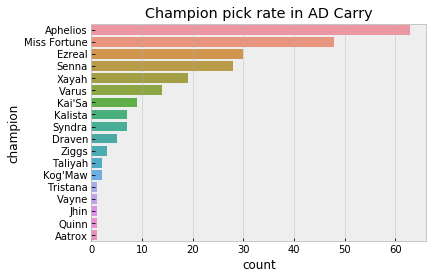

Number of different champions in AD Carry : 18


In [22]:


graph_data = data[(data.player != 'Team') & (data.position == 'bot')]
sns.countplot(y="champion",data=graph_data, order=graph_data['champion'].value_counts().index)
plt.title('Champion pick rate in AD Carry')
plt.show()

print('Number of different champions in AD Carry : {}'.format(len(graph_data['champion'].unique())))



In [23]:
champion_list = ['Aatrox', 'Elise', 'Qiyana', 'Senna', 'Nautilus', 'Ornn',
       'Lee Sin', 'Mordekaiser', 'Aphelios', 'Braum', "Rek'Sai",
       "Vel'koz", 'Cassiopeia', 'Miss Fortune', 'Leona', 'Irelia',
       'Gragas', 'Gangplank', 'Jarvan IV', 'LeBlanc', 'Yasuo', 'Varus',
       'Xayah', 'Swain', 'Diana', 'Rakan', 'Rumble', 'Zoe', 'Taliyah',
       'Pantheon', 'Olaf', 'Vladimir', 'Tahm Kench', 'Gnar', 'Renekton',
       'Ryze', 'Nocturne', 'Orianna', 'Tristana', 'Syndra', 'Sett',
       'Azir', 'Soraka', 'Lucian', 'Thresh', 'Morgana', 'Camille',
       'Ezreal', 'Rengar', 'Sylas', 'Bard', 'Urgot', "Cho'gath",
       'Lissandra', 'Draven', "Kai'Sa", 'Veigar', 'Karthus', 'Yuumi',
       'Sejuani', 'Kassadin', 'Singed', 'Sona', 'Ekko', 'Pyke', 'Viktor',
       'Vayne', 'Nidalee', 'Kled', 'Zac', 'Kalista', 'Taric', 'Karma',
       'Ziggs', 'Poppy', 'Kennen', 'Trundle', 'Corki', 'Akali', 'Lulu',
       'Galio', 'Janna', 'Maokai', 'Blitzcrank', 'Jayce', 'Sion', 'Neeko',
       'Malphite', 'Kindred', 'Jax', 'Evelynn', 'Graves', 'Jhin', 'Shen',
       'Shyvana', 'Zed', 'Teemo', 'Quinn', 'Annie', 'Zilean', "Kog'Maw"]

In [24]:
champion_names = data.champion.unique()
champions = pd.DataFrame(data[(data.champion == 'Gnar')].mean())
champions = champions.transpose()
champions.rename(index={0:'Gnar'}, inplace=True)
champion_app = data['champion']
for champion in champion_names:
    if champion !=  'Gnar':
        p = pd.DataFrame((data[(data.champion == champion)].mean())).transpose()
        p.rename(index={0: champion}, inplace=True)
        champions = pd.concat([champions, p], sort=False)
        for player in player_list:
            p = pd.DataFrame((data[(data.player == player)].mean())).transpose()
            p.rename(index={0: player}, inplace=True)
            players = pd.concat([players, p], sort=False)
        
        
        
champions['Played'] = champion_app.value_counts()        
champions_mean = pd.DataFrame(champions.mean()).transpose()
champions_max = pd.DataFrame(champions.max()).transpose()
champions_min = pd.DataFrame(champions.min()).transpose()
champions_median = pd.DataFrame(champions.median()).transpose()

# !!!!!!!!!!! stats provisionals, s'haurien d'adaptar per rol/team , etc
labels = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm']
# update player positions as they had been lost

for champion in champion_list:
    if champion != 'Team':
        champions.loc[champion, 'position'] = data[data.champion == champion].position.values[0]
        champions.loc[champion, 'team'] = data[data.champion == champion].team.values[0]



In [25]:
champions.columns

Index(['game', 'patch', 'playerid', 'gamelength', 'result', 'kills', 'deaths',
       'assists', 'teamkills', 'teamdeaths', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'firstblood', 'firstbloodkill',
       'firstbloodassist', 'firstbloodvictim', 'team kpm', 'ckpm',
       'firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes',
       'opp_elementaldrakes', 'infernals', 'mountains', 'clouds', 'oceans',
       'dragons (type unknown)', 'elders', 'opp_elders', 'heralds',
       'opp_heralds', 'firstbaron', 'barons', 'opp_barons', 'firsttower',
       'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
       'inhibitors', 'opp_inhibitors', 'damagetochampions', 'dpm',
       'damageshare', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold',
       'earned gpm', 'earnedgoldshare', 'goldspent', 'gspd', 'total cs',
       'minionkills', 'monsterkills', 'monsterkillsownjungle',
       

## Clean some data! drop not meaningful rows or with NaN numbers and one invalid observation

In [26]:
drop_list = ['game', 'patch', 'playerid', 'opp_dragons', 'elementaldrakes','opp_elementaldrakes', 'infernals', 'mountains', 'clouds', 'oceans','dragons (type unknown)', 'elders', 'opp_elders', 'heralds','opp_heralds', 'firstbaron', 'barons', 'opp_barons', 'firsttower','towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers', 'inhibitors', 'opp_inhibitors','wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm','goldspent', 'gspd', 'gameid', 'url', 'league', 'split', 'date', 'side','player', 'team', 'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5']
champions =champions.drop(drop_list, axis=1)

champions= champions[champions.position != 'Team']

## Show champions played more than 3 times ordered by a certain variable

In [27]:
played_3 =  champions['Played']>=3
champions[played_3].sort_values(by=['goldat15'], ascending=False)


,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,...,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,position,Played
Kalista,1948.111111,0.777778,5.666667,2.222222,7.333333,19.111111,13.666667,0.888889,0.00,0.0,...,5892.750000,132.625000,5573.125000,5584.125000,124.375000,1055.750000,308.625000,8.250000,bot,9.0
Lucian,1995.750000,0.750000,6.000000,2.500000,5.500000,16.250000,11.750000,0.750000,0.25,0.0,...,7567.250000,144.750000,4676.500000,6525.250000,110.250000,1646.750000,1042.000000,34.500000,mid,4.0
Ziggs,1929.250000,0.250000,3.750000,5.000000,7.500000,16.500000,22.000000,0.000000,0.00,0.0,...,6053.000000,116.500000,5404.000000,6402.500000,105.500000,657.750000,-349.500000,11.000000,mid,4.0
Tristana,1988.571429,0.857143,4.714286,1.000000,5.857143,15.142857,8.428571,0.714286,0.00,0.0,...,7157.142857,139.857143,5171.285714,6947.142857,134.285714,846.857143,210.000000,5.571429,mid,7.0
Draven,2059.000000,0.200000,2.200000,2.000000,4.800000,9.000000,16.400000,0.000000,0.00,0.0,...,5503.800000,138.800000,6053.800000,5718.200000,129.200000,-40.200000,-214.400000,9.600000,bot,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tahm Kench,1991.576923,0.423077,0.500000,3.153846,5.692308,11.000000,13.692308,0.000000,0.00,0.0,...,4000.807692,28.884615,3463.923077,3888.192308,24.461538,-4.538462,112.615385,4.423077,sup,26.0
Braum,2090.421053,0.447368,0.447368,2.342105,7.578947,10.868421,11.736842,0.000000,0.00,0.0,...,3763.868421,20.052632,3360.368421,3696.842105,21.763158,-5.447368,67.026316,-1.710526,sup,38.0
Rakan,1992.870968,0.483871,0.935484,2.419355,8.161290,13.000000,12.483871,0.000000,0.00,0.0,...,3722.387097,19.645161,3449.322581,3920.451613,22.838710,-95.741935,-198.064516,-3.193548,sup,31.0
Yuumi,1906.846154,0.615385,0.461538,1.307692,9.538462,10.923077,10.615385,0.076923,0.00,0.0,...,4124.000000,8.076923,3824.461538,4041.153846,42.230769,-548.923077,82.846154,-34.153846,sup,13.0


## Function for comparing champions

In [28]:
def vs_champion_radar_graph(champion_name1, champion_name2, color1='orange', color2='lightgray',title=None, players=players,role='ADC'):
    champion_max = pd.DataFrame(champions[champions.position == role].max()).transpose()
    
    if not title:
         title='{} vs {}'.format(champion_name1, champion_name2)
    
    x1 = pd.DataFrame(champions.loc[champion_name1, labels]).transpose()
    x2 = pd.DataFrame(champions.loc[champion_name2, labels]).transpose()
    # MEDIAN : x3 = pd.DataFrame(players[players.position == role].median()).transpose()
    
    """
        MEDIAN
        go.Scatterpolar(
      name = player_name2,
      r = [(x3['wards'].values[0] / player_max['wards'].values[0]) * 100,(x3['dmgtochamps'].values[0] / player_max['dmgtochamps'].values[0]) * 100,100 * (x3['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x3['k'].values[0] / player_max['k'].values[0]),100 * (x3['d'].values[0] / player_max['d'].values[0]),100 * (x3['a'].values[0] / player_max['a'].values[0]),100 * (x3["wards"].values[0] / player_max['wards'].values[0])],
      theta = ['Wards','Damages to champs', 'Total gold','Kills','Deaths','Assists','Wards'],
      fill = 'toself',
         line =  dict(
                color = 'black'
            )
        ),
        
    add as 1st element in array below if you want
    """
   
    
    data = [go.Scatterpolar(
      name = champion_name1,
      r = [(x1['opp_csat15'].values[0] / player_max['opp_csat15'].values[0]) * 100,(x1['csat15'].values[0] / player_max['csat15'].values[0]) * 100,100 * (x1['monsterkills'].values[0] / player_max['monsterkills'].values[0]),100 * (x1['monsterkillsownjungle'].values[0] / player_max['monsterkillsownjungle'].values[0]),100 * (x1['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x1['earnedgold'].values[0] / player_max['earnedgold'].values[0]),100 * (x1["wardsplaced"].values[0] / player_max['wardsplaced'].values[0]),100 * (x1["wpm"].values[0] / player_max['wpm'].values[0])],
      #theta =['First Blood', 'Game length', 'Kills', 'Deaths', 'Damages to champs','Total gold','First Baron','Herald','First tower','First mid outer tower','First to three towers','Gold difference at 15', 'First Blood'],
      theta = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm'],
      fill = 'toself',
         line =  dict(
                color = color1
            )
    ),
           
    go.Scatterpolar(
      name = champion_name2,
      r = [(x2['opp_csat15'].values[0] / player_max['opp_csat15'].values[0]) * 100,(x2['csat15'].values[0] / player_max['csat15'].values[0]) * 100,100 * (x2['monsterkills'].values[0] / player_max['monsterkills'].values[0]),100 * (x2['monsterkillsownjungle'].values[0] / player_max['monsterkillsownjungle'].values[0]),100 * (x2['totalgold'].values[0] / player_max['totalgold'].values[0]),100 * (x2['earnedgold'].values[0] / player_max['earnedgold'].values[0]),100 * (x2["wardsplaced"].values[0] / player_max['wardsplaced'].values[0]),100 * (x2["wpm"].values[0] / player_max['wpm'].values[0])],
      #theta =['First Blood', 'Game length', 'Kills', 'Deaths', 'Damages to champs','Total gold','First Baron','Herald','First tower','First mid outer tower','First to three towers','Gold difference at 15', 'First Blood'],
      theta = ['opp_csat15','csat15','monsterkills','monsterkillsownjungle','totalgold','earnedgold','wardsplaced','wpm'],
      fill = 'toself',
         line =  dict(
                color = color2
            )
    )
           
    ]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 100]
        )
      ),
      showlegend = False,
      title = "{}".format(title)
    )
    fig = go.Figure(data=data, layout=layout)
    

    return iplot(fig, filename = "Radar")


In [29]:
vs_champion_radar_graph('Ezreal',"Miss Fortune", color1='blue', color2='black',role='ADC')


In [30]:
data_summer = pd.read_csv('2020summer.csv', delimiter = ',')
dataS = pd.DataFrame(data_summer[(data_summer.league == 'LEC')])
dataS.shape

(420, 100)